In [1]:
import torch
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
names = pd.read_csv("https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt")
names = names.values
names = names.reshape(1,-1).squeeze()
names

array(['olivia', 'ava', 'isabella', ..., 'zyrie', 'zyron', 'zzyzx'],
      shape=(32032,), dtype=object)

In [3]:
chars = sorted(list(set("".join(names))))

stoi = {s: i+1 for i, s in enumerate(chars)}
stoi["."] = 0

itos = {i: s for s,i in stoi.items()}


In [4]:
BLOCK_SIZE = 3

X, y = [], []

for name in names[:5]:
    context  = [0] * BLOCK_SIZE
    for letter in name + ".":
        ix = stoi[letter]

        X.append(context)
        y.append(ix)

        context = context[1:] + [ix]

X = torch.tensor(X)
y = torch.tensor(y)

In [5]:
for features, targ in zip(X,y):
    print(features, targ)
    break

tensor([0, 0, 0]) tensor(15)


In [6]:
X.shape

torch.Size([37, 3])

In [7]:
C = torch.randn((27, 2))
emb = C[X]
emb

tensor([[[-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [-1.0603,  0.6739]],

        [[-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [ 2.4954, -0.2245]],

        [[-1.0603,  0.6739],
         [ 2.4954, -0.2245],
         [-0.1269,  0.3087]],

        [[ 2.4954, -0.2245],
         [-0.1269,  0.3087],
         [ 0.6358,  2.1315]],

        [[-0.1269,  0.3087],
         [ 0.6358,  2.1315],
         [ 0.9379, -1.1108]],

        [[ 0.6358,  2.1315],
         [ 0.9379, -1.1108],
         [ 0.6358,  2.1315]],

        [[ 0.9379, -1.1108],
         [ 0.6358,  2.1315],
         [-0.2969,  0.2292]],

        [[-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [-1.0603,  0.6739]],

        [[-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [-0.2969,  0.2292]],

        [[-1.0603,  0.6739],
         [-0.2969,  0.2292],
         [ 0.9379, -1.1108]],

        [[-0.2969,  0.2292],
         [ 0.9379, -1.1108],
         [-0.2969,  0.2292]],

        [[-1.0603,  0

In [8]:
emb.shape

torch.Size([37, 3, 2])

In [9]:
C[[0,0,0]]

tensor([[-1.0603,  0.6739],
        [-1.0603,  0.6739],
        [-1.0603,  0.6739]])

In [10]:
torch.concat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], dim=1)

tensor([[-1.0603,  0.6739, -1.0603,  0.6739, -1.0603,  0.6739],
        [-1.0603,  0.6739, -1.0603,  0.6739,  2.4954, -0.2245],
        [-1.0603,  0.6739,  2.4954, -0.2245, -0.1269,  0.3087],
        [ 2.4954, -0.2245, -0.1269,  0.3087,  0.6358,  2.1315],
        [-0.1269,  0.3087,  0.6358,  2.1315,  0.9379, -1.1108],
        [ 0.6358,  2.1315,  0.9379, -1.1108,  0.6358,  2.1315],
        [ 0.9379, -1.1108,  0.6358,  2.1315, -0.2969,  0.2292],
        [-1.0603,  0.6739, -1.0603,  0.6739, -1.0603,  0.6739],
        [-1.0603,  0.6739, -1.0603,  0.6739, -0.2969,  0.2292],
        [-1.0603,  0.6739, -0.2969,  0.2292,  0.9379, -1.1108],
        [-0.2969,  0.2292,  0.9379, -1.1108, -0.2969,  0.2292],
        [-1.0603,  0.6739, -1.0603,  0.6739, -1.0603,  0.6739],
        [-1.0603,  0.6739, -1.0603,  0.6739,  0.6358,  2.1315],
        [-1.0603,  0.6739,  0.6358,  2.1315,  1.0115, -0.4330],
        [ 0.6358,  2.1315,  1.0115, -0.4330, -0.2969,  0.2292],
        [ 1.0115, -0.4330, -0.2969,  0.2

In [11]:
emb[:,0,:], emb[:,1,:], emb[:,2,:]

(tensor([[-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [ 2.4954, -0.2245],
         [-0.1269,  0.3087],
         [ 0.6358,  2.1315],
         [ 0.9379, -1.1108],
         [-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [-0.2969,  0.2292],
         [-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [ 0.6358,  2.1315],
         [ 1.0115, -0.4330],
         [-0.2969,  0.2292],
         [-1.3292, -0.0715],
         [-0.0601,  0.4962],
         [-0.1269,  0.3087],
         [-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [ 1.0115, -0.4330],
         [ 2.4954, -0.2245],
         [ 1.2788, -0.7208],
         [-0.2043,  0.9762],
         [-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [-1.0603,  0.6739],
         [-0.0488,  0.9609],
         [-0.2043,  0.9762],
         [-0.2969,  0.2292],
         [-1.3626, -1.0829],
         [-0.1

In [12]:
torch.concat(torch.unbind(emb,1), dim=1)


tensor([[-1.0603,  0.6739, -1.0603,  0.6739, -1.0603,  0.6739],
        [-1.0603,  0.6739, -1.0603,  0.6739,  2.4954, -0.2245],
        [-1.0603,  0.6739,  2.4954, -0.2245, -0.1269,  0.3087],
        [ 2.4954, -0.2245, -0.1269,  0.3087,  0.6358,  2.1315],
        [-0.1269,  0.3087,  0.6358,  2.1315,  0.9379, -1.1108],
        [ 0.6358,  2.1315,  0.9379, -1.1108,  0.6358,  2.1315],
        [ 0.9379, -1.1108,  0.6358,  2.1315, -0.2969,  0.2292],
        [-1.0603,  0.6739, -1.0603,  0.6739, -1.0603,  0.6739],
        [-1.0603,  0.6739, -1.0603,  0.6739, -0.2969,  0.2292],
        [-1.0603,  0.6739, -0.2969,  0.2292,  0.9379, -1.1108],
        [-0.2969,  0.2292,  0.9379, -1.1108, -0.2969,  0.2292],
        [-1.0603,  0.6739, -1.0603,  0.6739, -1.0603,  0.6739],
        [-1.0603,  0.6739, -1.0603,  0.6739,  0.6358,  2.1315],
        [-1.0603,  0.6739,  0.6358,  2.1315,  1.0115, -0.4330],
        [ 0.6358,  2.1315,  1.0115, -0.4330, -0.2969,  0.2292],
        [ 1.0115, -0.4330, -0.2969,  0.2

In [13]:
emb_viewed = emb.view(-1, 6)
emb_viewed

tensor([[-1.0603,  0.6739, -1.0603,  0.6739, -1.0603,  0.6739],
        [-1.0603,  0.6739, -1.0603,  0.6739,  2.4954, -0.2245],
        [-1.0603,  0.6739,  2.4954, -0.2245, -0.1269,  0.3087],
        [ 2.4954, -0.2245, -0.1269,  0.3087,  0.6358,  2.1315],
        [-0.1269,  0.3087,  0.6358,  2.1315,  0.9379, -1.1108],
        [ 0.6358,  2.1315,  0.9379, -1.1108,  0.6358,  2.1315],
        [ 0.9379, -1.1108,  0.6358,  2.1315, -0.2969,  0.2292],
        [-1.0603,  0.6739, -1.0603,  0.6739, -1.0603,  0.6739],
        [-1.0603,  0.6739, -1.0603,  0.6739, -0.2969,  0.2292],
        [-1.0603,  0.6739, -0.2969,  0.2292,  0.9379, -1.1108],
        [-0.2969,  0.2292,  0.9379, -1.1108, -0.2969,  0.2292],
        [-1.0603,  0.6739, -1.0603,  0.6739, -1.0603,  0.6739],
        [-1.0603,  0.6739, -1.0603,  0.6739,  0.6358,  2.1315],
        [-1.0603,  0.6739,  0.6358,  2.1315,  1.0115, -0.4330],
        [ 0.6358,  2.1315,  1.0115, -0.4330, -0.2969,  0.2292],
        [ 1.0115, -0.4330, -0.2969,  0.2

In [14]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

W2 = torch.randn((100, 27))
b2 = torch.randn(27)

layer1 = torch.tanh(emb_viewed @ W1 + b1)
logits = torch.tanh(layer1 @ W2 + b2)
logits.shape

torch.Size([37, 27])

In [15]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0158, 0.0845, 0.0169, 0.0115, 0.0115, 0.0115, 0.0115, 0.0848, 0.0847,
         0.0115, 0.0848, 0.0115, 0.0848, 0.0848, 0.0115, 0.0848, 0.0115, 0.0115,
         0.0115, 0.0848, 0.0115, 0.0115, 0.0848, 0.0115, 0.0121, 0.0115, 0.0320],
        [0.0655, 0.0655, 0.0106, 0.0089, 0.0382, 0.0651, 0.0089, 0.0653, 0.0089,
         0.0463, 0.0655, 0.0655, 0.0655, 0.0091, 0.0089, 0.0655, 0.0089, 0.0210,
         0.0089, 0.0089, 0.0089, 0.0655, 0.0655, 0.0655, 0.0093, 0.0089, 0.0655],
        [0.0587, 0.0081, 0.0079, 0.0079, 0.0079, 0.0079, 0.0587, 0.0587, 0.0587,
         0.0568, 0.0142, 0.0079, 0.0587, 0.0587, 0.0587, 0.0386, 0.0587, 0.0537,
         0.0521, 0.0587, 0.0079, 0.0079, 0.0587, 0.0095, 0.0586, 0.0079, 0.0583],
        [0.0665, 0.0200, 0.0687, 0.0625, 0.0098, 0.0703, 0.0095, 0.0360, 0.0703,
         0.0095, 0.0702, 0.0095, 0.0099, 0.0095, 0.0695, 0.0255, 0.0558, 0.0095,
         0.0703, 0.0703, 0.0095, 0.0095, 0.0095, 0.0586, 0.0095, 0.0703, 0.0095],
        [0.0449, 0.0532,

In [16]:
probs[0]

tensor([0.0158, 0.0845, 0.0169, 0.0115, 0.0115, 0.0115, 0.0115, 0.0848, 0.0847,
        0.0115, 0.0848, 0.0115, 0.0848, 0.0848, 0.0115, 0.0848, 0.0115, 0.0115,
        0.0115, 0.0848, 0.0115, 0.0115, 0.0848, 0.0115, 0.0121, 0.0115, 0.0320])

In [17]:
loss = -probs[torch.arange(32), y[:32]].log().mean()
loss

tensor(3.2825)

In [18]:
y

tensor([15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,  1,  2,  5, 12, 12,
         1,  0, 19, 15, 16,  8,  9,  1,  0,  3,  8,  1, 18, 12, 15, 20, 20,  5,
         0])

In [19]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(names)
n1 = int(0.8*len(names))
n2 = int(0.9*len(names))

X_train, y_train = build_dataset(names[:n1])
X_val, y_val = build_dataset(names[n1:n2])
X_test, y_test = build_dataset(names[n2:])


torch.Size([182436, 3]) torch.Size([182436])
torch.Size([22844, 3]) torch.Size([22844])
torch.Size([22861, 3]) torch.Size([22861])


In [20]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [21]:
lri = []
lossi = []
stepi = []

In [120]:
import torch.nn.functional as F


def train_step(X,y, C,W1,W2,b1,b2, parameters, lr=0.1):  
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, y[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  return loss.item()


In [ ]:

epochi = []
lossi = []

for i in range(1000):
  loss_curr = train_step(X, y,C, W1,W2,b1,b2, parameters)
  epochi.append(i)
  lossi.append(loss_curr)

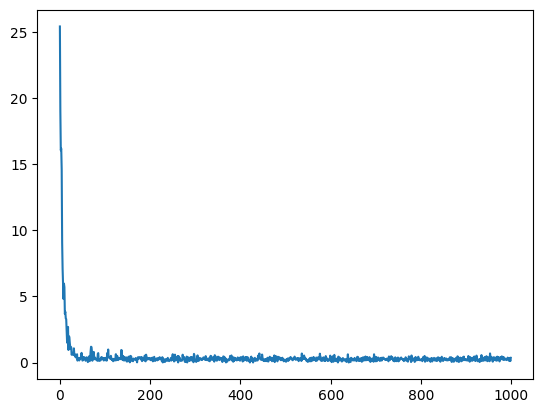

In [23]:
plt.plot(epochi, lossi)

In [24]:
lre = torch.linspace(-3,1,10000)
lrs = 10** lre

lri = []
lossi = []


In [25]:

for i in range(10000):
    # minibatch construct
    ix = torch.randint(0, X_train.shape[0], (32,))

    # forward pass
    emb = C[X_train[ix]] # (32, 3, 10)
    h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, y_train[ix])
    #print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    lri.append(lre[i])
    lossi.append(loss.item())

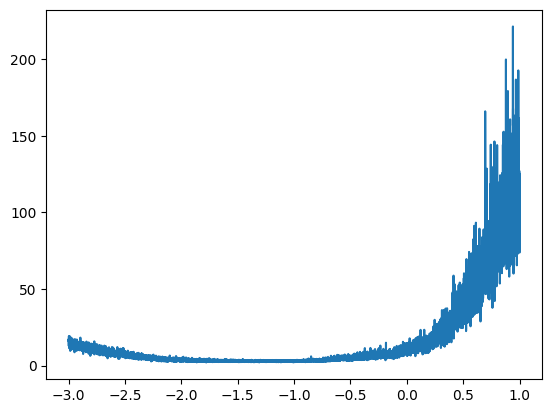

In [26]:
plt.plot(lri, lossi)

In [27]:
lossi_test = []
lossi_train = []
epochi = []

In [119]:

def test_step(X,y,C,W1,W2,b1,b2):
    
     # forward pass
    with torch.no_grad():
        emb = C[X] # (x, 3, 10)
        h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1) # (x, 200)
        logits = h @ W2 + b2 # (x, 27)
        loss = F.cross_entropy(logits, y)
        return loss.item()



In [ ]:

for i in range(3000):
    loss_train = train_step(X_train,y_train,C,W1,W2,b1,b2, parameters, lr=0.3)
    loss_test = test_step(X_test,y_test,C,W1,W2,b1,b2)

    try:
        epochi.append(epochi[-1]+1)
    except:
        epochi.append(0)
    finally:
        lossi_train.append(loss_train)
        lossi_test.append(loss_test)

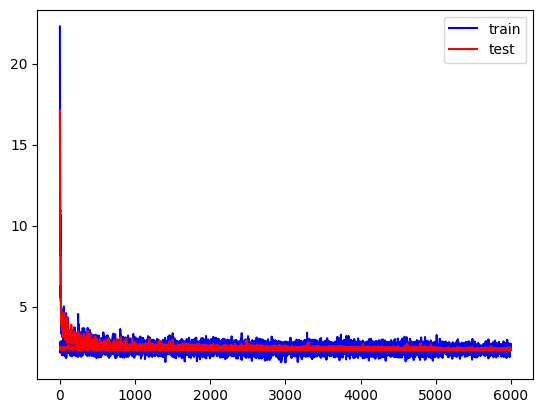

In [91]:
plt.plot(epochi, lossi_train, c="blue", label="train")
plt.plot(epochi, lossi_test, c="red", label="test")
plt.legend()
plt.show()

In [30]:
for i in range(10000):
  loss_curr = train_step(X, y,C, W1,W2,b1,b2, parameters)

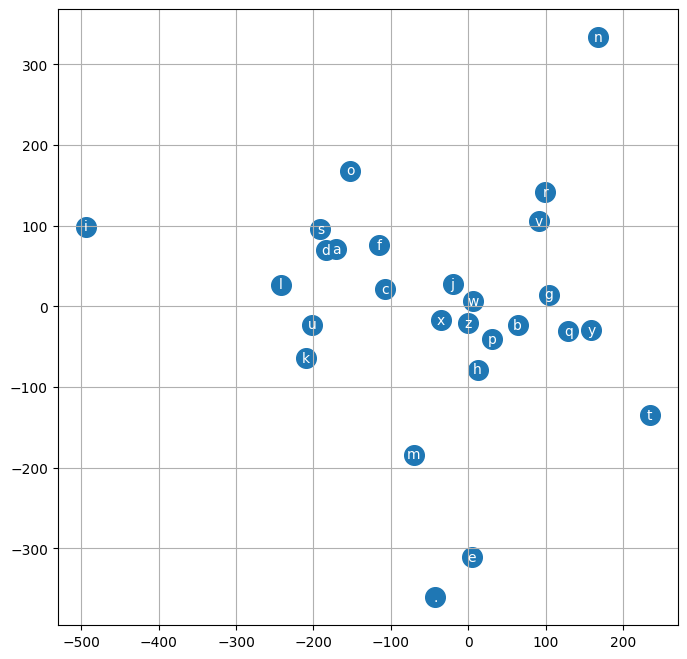

In [31]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [121]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [122]:
lossi_train = []
lossi_test = []
epochi = []

In [123]:
for i in range(5000):
    loss_train = train_step(X_train,y_train,C,W1,W2,b1,b2, parameters, lr=0.3)
    loss_test = test_step(X_test,y_test,C,W1,W2,b1,b2)

    epochi.append(i)
    lossi_train.append(loss_train)
    lossi_test.append(loss_test)

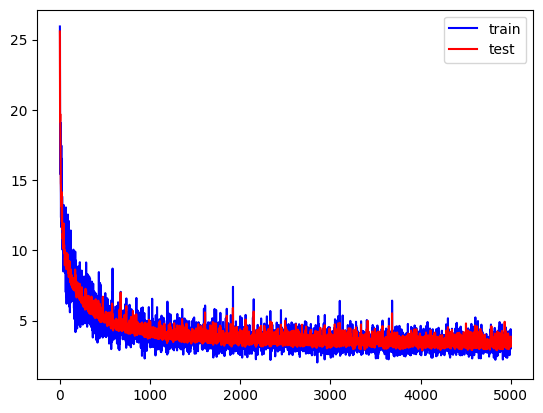

In [124]:
plt.plot(epochi, lossi_train, c="blue", label="train")
plt.plot(epochi, lossi_test, c="red", label="test")
plt.legend()
plt.show()

In [36]:
for _ in range(10000):
    train_step(X_train, y_train, C, W1, W2, b1, b2, parameters, lr=0.3)

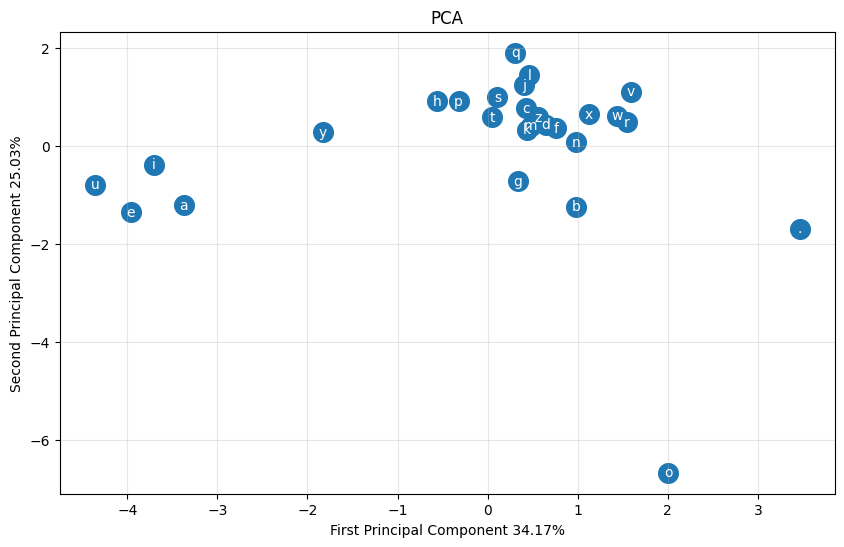

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

colors = ["red","blue","green","yellow"]

# First standardize the features since PCA is sensitive to scale
scaler = StandardScaler()
# Exclude cluster column and any non-numeric columns
X_scaled = scaler.fit_transform(C.detach().numpy())

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create visualization
plt.figure(figsize=(10, 6))

plt.scatter(
        X_pca[:, 0], 
        X_pca[:, 1],
        # c=colors[cluster_id],
        # label=f'Cluster {cluster_id}',
        # alpha=0.6
        s=200
        
    )

for i in range(X_pca.shape[0]):
    plt.text(X_pca[i,0].item(), X_pca[i,1].item(), itos[i], ha="center", va="center", color='white')

# Add labels and title
plt.xlabel(f'First Principal Component {pca.explained_variance_ratio_[0]*100:.2f}%')
plt.ylabel(f'Second Principal Component {pca.explained_variance_ratio_[1]*100:.2f}%')
plt.title('PCA')
plt.grid(True, alpha=0.3)

plt.show()


In [38]:
g = torch.Generator().manual_seed(42)

for _ in range(20):
    out = []
    context = [0] * BLOCK_SIZE
    while True:
        emb = C[torch.tensor([context])] # (1, 3, 10)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print("".join(itos[num] for num in out))
    


ansh.
anva.
amareida.
haviasta.
saamaresta.
nah.
ausla.
najaise.
ana.
nah.
ana.
najareston.
nar.
anah.
taabehvahiasa.
aasta.
waan.
tahjahmastachaislaijahahariah.
naana.
vahah.


In [ ]:
block_size = 3
vocab_size = 27
n_ebmd = 10
n_hidden = 200

g = torch.Generator().manual_seed(42)

C = torch.randn(vocab_size, n_ebmd, generator=g)
W1 = torch.randn(n_ebmd * block_size, n_hidden, generator=g) * (5/3)/((n_ebmd * block_size))
b1 = torch.randn(n_hidden, generator=g)* 0.01
W2 = torch.randn(n_hidden, vocab_size, generator=g) * (5/3)/((n_ebmd * block_size))
b = torch.randn(vocab_size, generator=g)* 0.01

parameters = [C, W1, b1, W2, b2]

print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True


11897


In [80]:
lr = 0.3

for i in range(10000):
    # minibatch construct
    ix = torch.randint(0, X_train.shape[0], (32,))

    # forward pass
    emb = C[X_train[ix]] # (32, 3, 10)
    pre_h = emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1
    h = torch.tanh(pre_h) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, y_train[ix])
    #print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -lr * p.grad
    
    break

    

(array([ 93., 194., 106., 129., 128., 151., 137., 148., 140., 148., 110.,
        104., 109., 122.,  94., 126., 133., 125., 108., 121., 124., 117.,
        127., 111., 120., 131., 103., 100., 110., 109., 119., 149., 107.,
        138., 116., 119., 100., 123., 160., 140., 136., 146., 147., 119.,
        148., 190., 170., 128., 116., 151.]),
 array([-9.96461332e-01, -9.56583023e-01, -9.16704774e-01, -8.76826465e-01,
        -8.36948156e-01, -7.97069848e-01, -7.57191539e-01, -7.17313290e-01,
        -6.77434981e-01, -6.37556672e-01, -5.97678423e-01, -5.57800114e-01,
        -5.17921805e-01, -4.78043497e-01, -4.38165247e-01, -3.98286939e-01,
        -3.58408630e-01, -3.18530321e-01, -2.78652012e-01, -2.38773763e-01,
        -1.98895454e-01, -1.59017146e-01, -1.19138896e-01, -7.92605877e-02,
        -3.93822789e-02,  4.96029854e-04,  4.03743386e-02,  8.02525878e-02,
         1.20130837e-01,  1.60009205e-01,  1.99887455e-01,  2.39765823e-01,
         2.79644072e-01,  3.19522321e-01,  3.59400

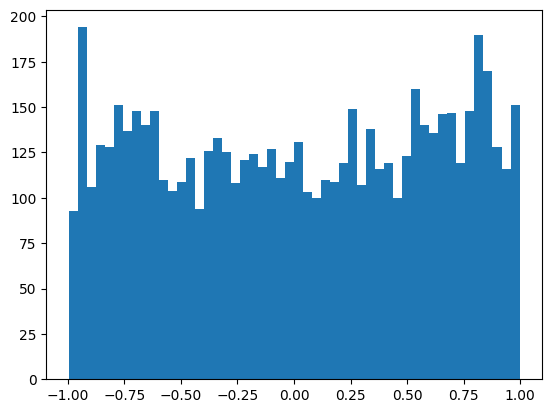

In [81]:
plt.hist(h.detach().view(-1), bins=50)

(array([  6.,   0.,   0.,   9.,   8.,   3.,   3.,  13.,  22.,  35.,  84.,
         78.,  58.,  81., 117., 139., 198., 224., 275., 242., 282., 354.,
        363., 397., 377., 346., 361., 353., 310., 303., 252., 204., 218.,
        163., 148.,  76.,  50.,  52.,  37.,  54.,  23.,  21.,  36.,   7.,
          7.,   8.,   1.,   1.,   0.,   1.]),
 array([-3.16769004, -3.03768802, -2.907686  , -2.77768397, -2.64768171,
        -2.51767969, -2.38767767, -2.25767565, -2.12767363, -1.9976716 ,
        -1.86766958, -1.73766744, -1.60766542, -1.4776634 , -1.34766126,
        -1.21765924, -1.08765721, -0.95765519, -0.82765317, -0.69765115,
        -0.56764913, -0.43764687, -0.30764484, -0.17764282, -0.0476408 ,
         0.08236122,  0.21236324,  0.34236526,  0.47236753,  0.60236955,
         0.73237157,  0.86237359,  0.99237561,  1.12237763,  1.25237966,
         1.38238168,  1.5123837 ,  1.64238572,  1.77238774,  1.90238976,
         2.03239179,  2.16239429,  2.29239631,  2.42239833,  2.55240035,
 

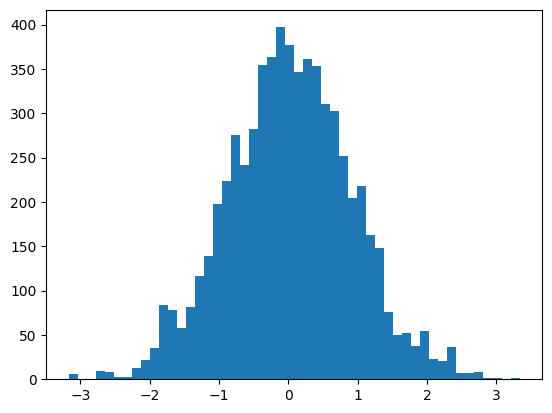

In [82]:
plt.hist(pre_h.detach().view(-1), bins=50)

In [83]:
lossi_train = []
lossi_test = []
epochi = []

In [84]:
for i in range(5000):
    loss_train = train_step(X_train,y_train,C,W1,W2,b1,b2, parameters, lr=0.3)
    loss_test = test_step(X_test,y_test,C,W1,W2,b1,b2)

    epochi.append(i)
    lossi_train.append(loss_train)
    lossi_test.append(loss_test)

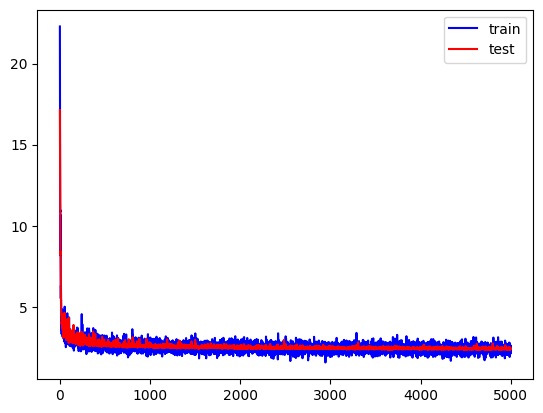

In [85]:
plt.plot(epochi, lossi_train, c="blue", label="train")
plt.plot(epochi, lossi_test, c="red", label="test")
plt.legend()
plt.show()

In [87]:
lossi_test[-1]

2.418635368347168

In [ ]:

block_size = 3
vocab_size = 27
n_ebmd = 10
n_hidden = 200

g = torch.Generator().manual_seed(42)

C = torch.randn(vocab_size, n_ebmd, generator=g)
W1 = torch.randn(n_ebmd * block_size, n_hidden, generator=g) * (5/3)/((n_ebmd * block_size))
b1 = torch.randn(n_hidden, generator=g)* 0.01
W2 = torch.randn(n_hidden, vocab_size, generator=g) * (5/3)/((n_hidden))
b = torch.randn(vocab_size, generator=g)* 0.01

parameters = [C, W1, b1, W2, b2]

print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True


11897


In [95]:
lossi_train = []
lossi_test = []
epochi = []

In [ ]:
import os
import tempfile
import mlflow

# Log model training with MLflow
with mlflow.start_run():
    # Log hyperparameters
    mlflow.log_params({
        "block_size": block_size,
        "vocab_size": vocab_size,
        "n_ebmd": n_ebmd,
        "n_hidden": n_hidden,
        "learning_rate": lr,
        "epochs": 5000
    })
    
    # Log final metrics
    mlflow.log_metric("final_train_loss", lossi_train[-1])
    mlflow.log_metric("final_test_loss", lossi_test[-1])
    mlflow.log_metric("best_test_loss", min(lossi_test))
    
    # Create temporary directory for artifacts
    with tempfile.TemporaryDirectory() as tmp_dir:
        torch.save(C, os.path.join(tmp_dir, "embeddings.pt"))
        torch.save(W1, os.path.join(tmp_dir, "W1.pt"))
        torch.save(W2, os.path.join(tmp_dir, "W2.pt"))
        mlflow.log_artifacts(tmp_dir)
    
    mlflow.set_tag("Model Type", "Makemore Character-Level LM")
    mlflow.set_tag("Status", "Completed")

In [127]:
block_size = 3
vocab_size = 27
n_ebmd = 10
n_hidden = 200

g = torch.Generator().manual_seed(42)

C = torch.randn(vocab_size, n_ebmd, generator=g)
W1 = torch.randn(n_ebmd * block_size, n_hidden, generator=g) * (5/3)/((n_ebmd * block_size))
b1 = torch.randn(n_hidden, generator=g)* 0.01
W2 = torch.randn(n_hidden, vocab_size, generator=g) * (5/3)/((n_hidden))
b = torch.randn(vocab_size, generator=g)* 0.01

bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))

parameters = [C, W1, b1, W2, b2, bngain, bnbias]

print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

12297


In [128]:
lossi_train = []
lossi_test = []
epochi = []

In [129]:
def train_step(X,y, C,W1,W2,b1,b2, bngain,  bnbias, parameters, lr=0.1):  
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]] # (32, 3, 10)
  hpreact = emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1 #(32, 200)
  hpreact = bngain * (hpreact - hpreact.mean(0, keepdim=True))/hpreact.std(0, keepdim=True) + bnbias
  h = torch.tanh(hpreact) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, y[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  return loss.item()

def test_step(X,y,C,W1,W2,b1,b2, bngain, bnbias):
    
     # forward pass
    with torch.no_grad():
        emb = C[X] # (x, 3, 10)
        hpreact = emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1
        hpreact = bngain * (hpreact - hpreact.mean(0, keepdim=True))/hpreact.std(0, keepdim=True) + bnbias
        h = torch.tanh(hpreact) # (x, 200)
        logits = h @ W2 + b2 # (x, 27)
        loss = F.cross_entropy(logits, y)
        return loss.item()

In [130]:
for i in range(5000):
    loss_train = train_step(X_train,y_train,C,W1,W2,b1,b2,bngain,bnbias, parameters, lr=0.3)
    loss_test = test_step(X_test,y_test,C,W1,W2,b1,b2,bngain,bnbias)

    epochi.append(i)
    lossi_train.append(loss_train)
    lossi_test.append(loss_test)

KeyboardInterrupt: 

In [115]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("batch normalization and init scaling")

with mlflow.start_run():
    mlflow.log_param("W1 init scale", (5/3)/((n_ebmd * block_size)))
    mlflow.log_param("W2 init scale", (5/3)/((n_hidden)))
    mlflow.log_param("epochs", 5000)
    mlflow.log_param("learning_rate", lr)

    mlflow.log_metric("loss_train", lossi_train[-1])
    mlflow.log_metric("loss_test", lossi_test[-1])
    mlflow.log_metric("loss_train_best", min(lossi_train))
    mlflow.log_metric("loss_test_best", min(lossi_test))

    

    
    